 **Predict Gradute Admissions**
 **Problem Statement**: This dataset is created for prediction of Graduate Admissions from an Indian Persepective

 The dataset contains several parameters which are considered important during the applications for Masters Programs.

 These parameters are:


1.   GRE Scores (out of 340)
2.   TOFEL Scores(out of 120)
1.   University Rating (out of 5)
2.   Statement of Purpose and Letter of Recommendation (out of 5)
1.   Undergradute GPA (out of 10)
2.   Reasearch Experience (either 0 or 1)
1.   Chance of Admit (ranging from 0 to 1) is the Target Variable










In [1]:
from io import IncrementalNewlineDecoder
#Importing the liabraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
sns.set ()
warnings.simplefilter('ignore')
from scipy import stats


In [2]:
#Reading the dataset and checking it
data = pd.read_csv("/content/Admission_Predict.csv")

In [3]:
#checking the first five rows of the dataset
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
# Checking the last 5 rows of the dataset
data.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


In [6]:
# checking data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [8]:
#Checking the columns
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

**There are 9 columns in the dataset**

# Data Munging and Wrangling

In [9]:
#checking the data types of the columns
data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

The data consist of integers and floats

In [10]:
# Checking the shape of the data
data.shape

(400, 9)

The data has 500 rows and 9 columns

In [11]:
# Checking for null values in the columns
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Fortunately our dataset has null values

In [12]:
# Checking the summary stastictics
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [13]:
#Droping the serial No column
data.drop('Serial No.',axis=1,inplace=True)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


# Exploratory Data Analysis

In [14]:
data.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

The "Chance" column is the outcome variable and takes value between 0 and 1.'1' represents that the subject is admitted to the program while '0' represents rejected applications. Problem can be classified "Binary Classification " problem where outcome probaility refers to the proability of subject being admitted to the program . Since only chance of admission is provided, the analysis will continue as a prediction analysis of chance of admission

In [15]:
#Checking the summary statistics
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


This shows some descripitive statistics on the dataset. From here you can see the following statistics
1. Row Count, which aligns to what the shape attribute showed us.
2. The mean, or average . 50% means Median it is very important to understand skewness of the Data . The standard deviation, or how spread out the data is. The minimum and maximum value of each column . The number of items that fall within the first, second and third percentiles.

In [16]:
data.groupby('University Rating').mean()

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,303.153846,99.076923,1.884615,2.211538,7.745769,0.192308,0.548077
2,309.177570,103.523364,2.705607,2.925234,8.183738,0.299065,0.625981
3,315.954887,106.887218,3.364662,3.402256,8.552256,0.533835,0.711880
4,324.824324,111.824324,4.108108,4.006757,9.021622,0.797297,0.818108
5,328.333333,113.666667,4.500000,4.358333,9.291167,0.866667,0.888167


Average chance of admission of subjects which appiled to program with rating 1 is less than that of the subjects which applied to program with higher ratings. Now let us analyze the subjects with more than 80 % of chance which is the third quartile of the chance data.

# EDA to gain Insights

Chance of Admit will be the response variable and proceed to check the individual column`s correaltion with the response variable

In [17]:
#checking the correaltion coefficient o TOFEL Score with chance of Admit
data.columns=data.columns.str.strip()
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [18]:
data[['TOEFL Score', 'Chance of Admit']].corr()

,TOEFL Score,Chance of Admit
TOEFL Score,1.000000,0.791594
Chance of Admit,0.791594,1.000000


TOEFL Score tends to be a good fit.

<Axes: xlabel='TOEFL Score', ylabel='Chance of Admit'>

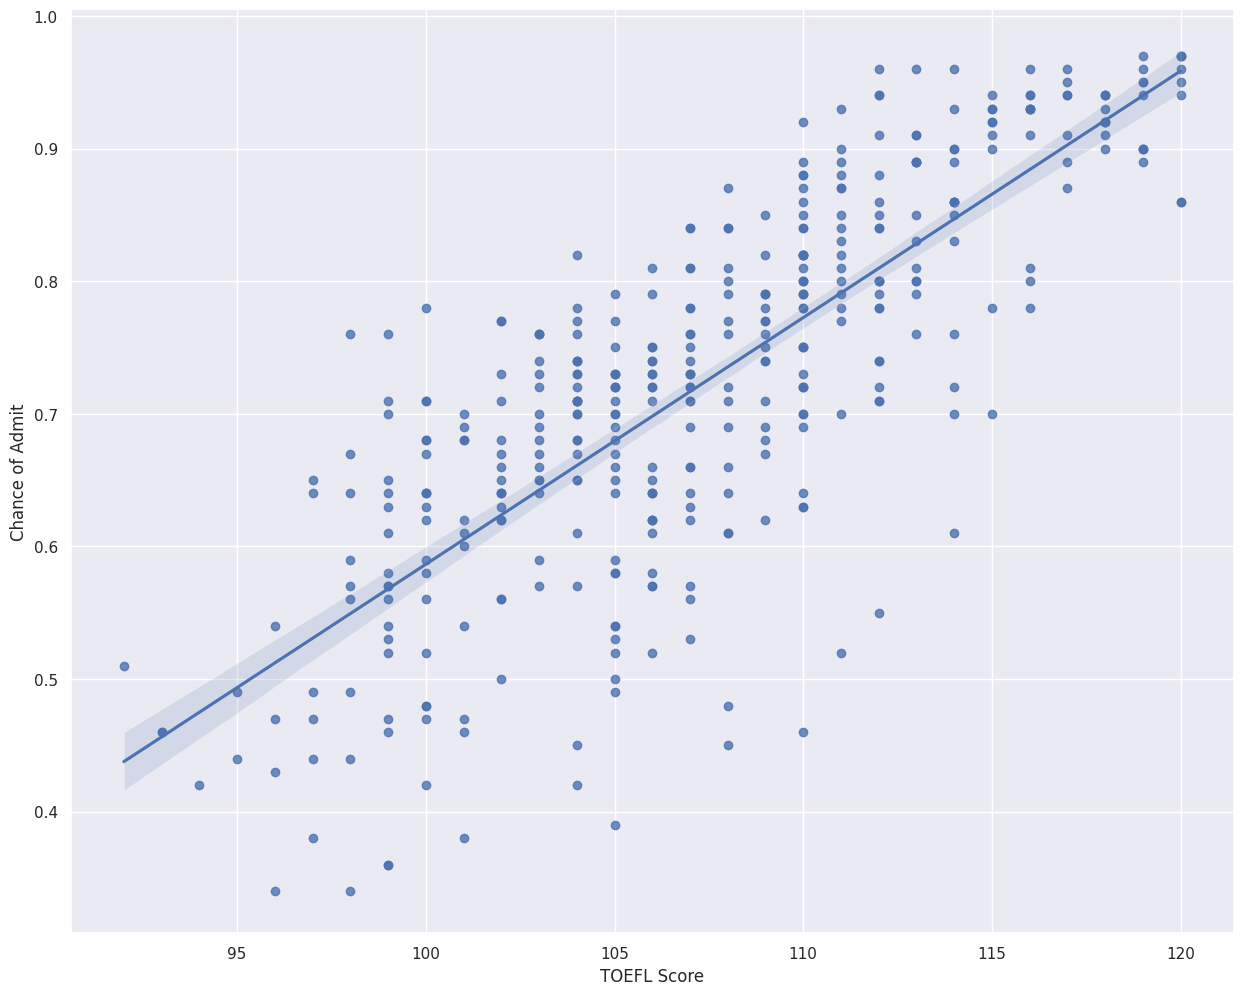

In [19]:
#Plotting the results using seaborn
plt.figure(figsize=(15,12))
sns.regplot(x='TOEFL Score',y='Chance of Admit',data=data)

In [20]:
#Let`s dig deeper to see Pearson Correaltion Coefficient
p_coeff,p_value=stats.pearsonr(data['TOEFL Score'],data['Chance of Admit'])
print('Pearson Coefficient:',p_coeff)
print('Pearson value :',p_value)

Pearson Coefficient: 0.7915939869351045
Pearson value : 3.6341021759970527e-87


Since, its pearson coefficient is almost 0.8 and p value quite less than 0.001. This seems like an ideal candidate

# Column : GRE Score (out of 340)

In [21]:
# Checking the correaltion of coefficient of GRE Score with chance of Admit
data[['GRE Score','Chance of Admit']].corr()

,GRE Score,Chance of Admit
GRE Score,1.00000,0.80261
Chance of Admit,0.80261,1.00000


It seems like GRE Score is good fit

<Axes: xlabel='GRE Score', ylabel='Chance of Admit'>

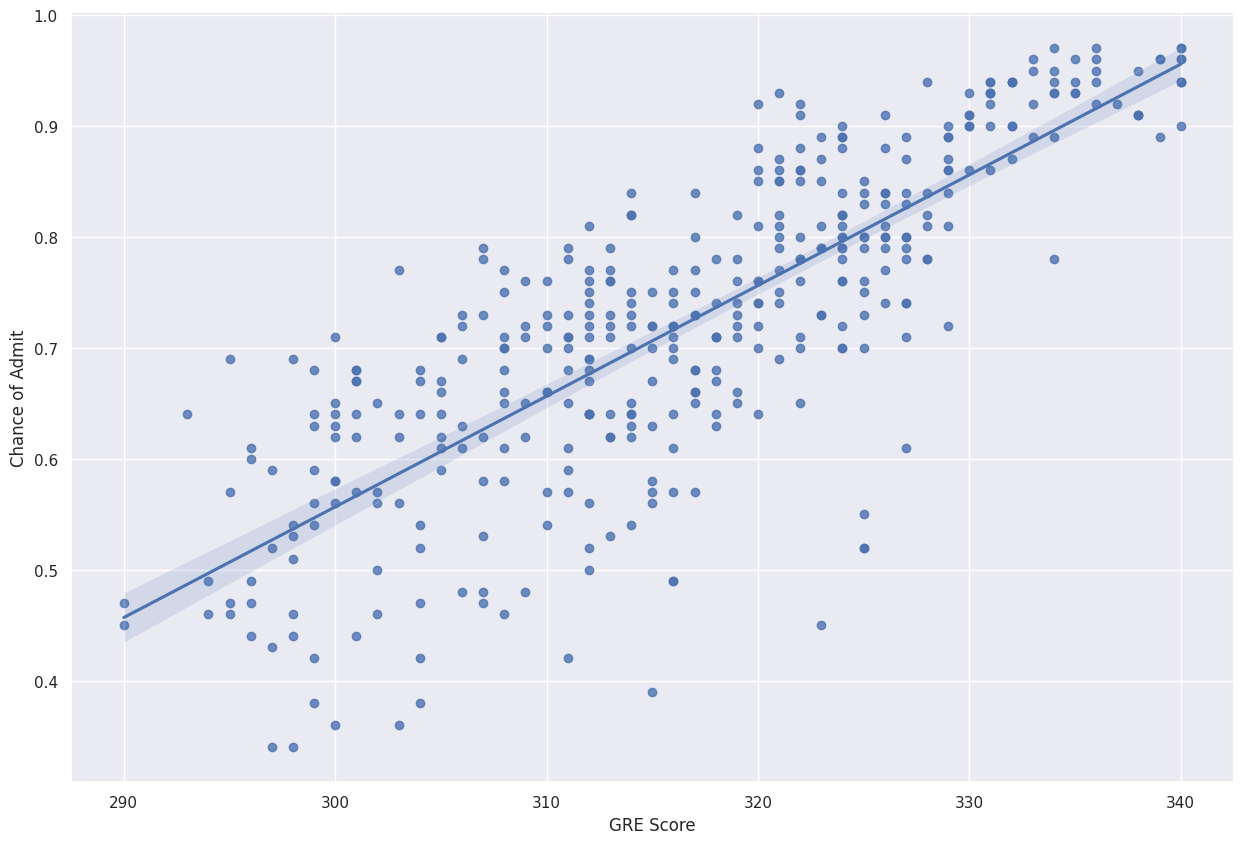

In [23]:
#plotting the results using seaborn
plt.figure(figsize=(15,10))
sns.regplot(x='GRE Score', y='Chance of Admit',data=data)

# Column: University Rating (out of 5)

<Axes: xlabel='University Rating', ylabel='Chance of Admit'>

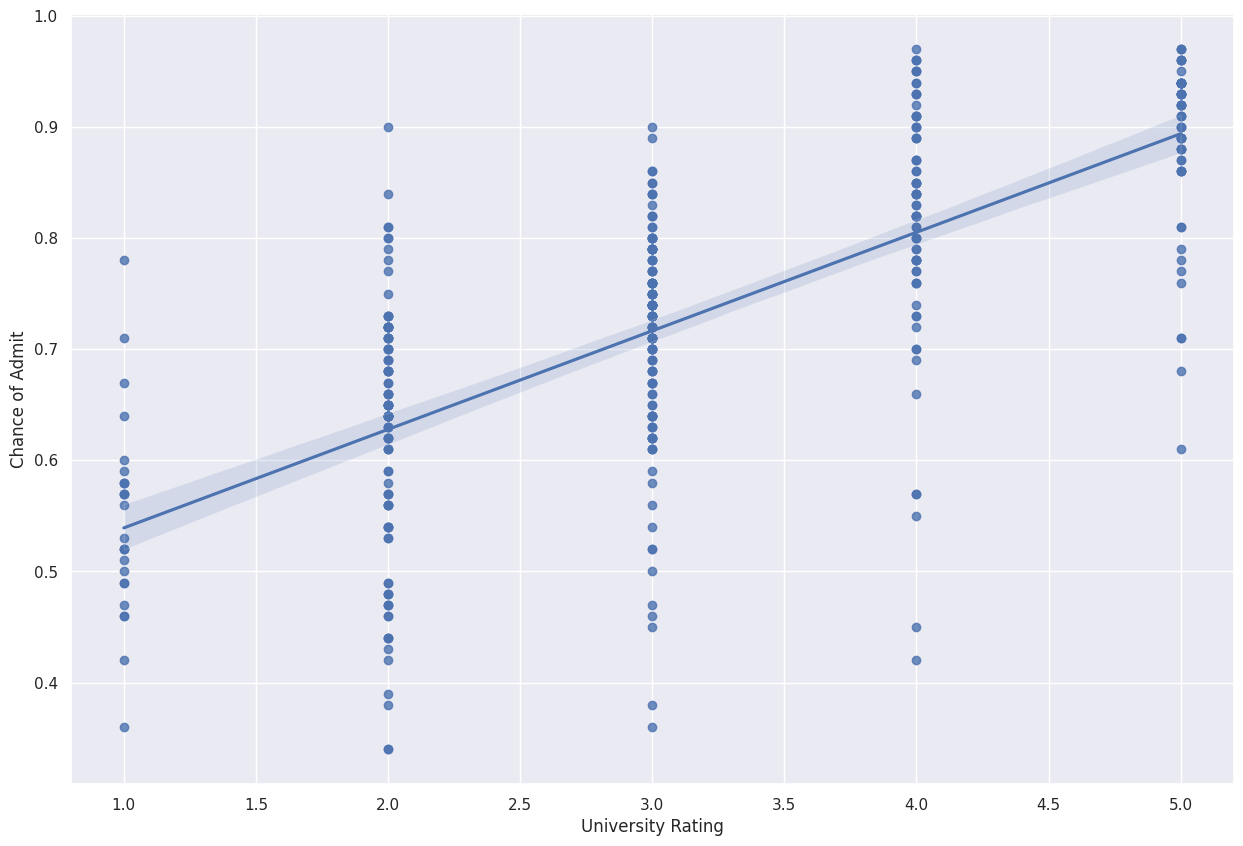

In [25]:
#Plotting the results using seaborn
plt.figure(figsize=(15,10))
sns.regplot(x='University Rating',y='Chance of Admit', data=data)

<Axes: xlabel='University Rating', ylabel='Chance of Admit'>

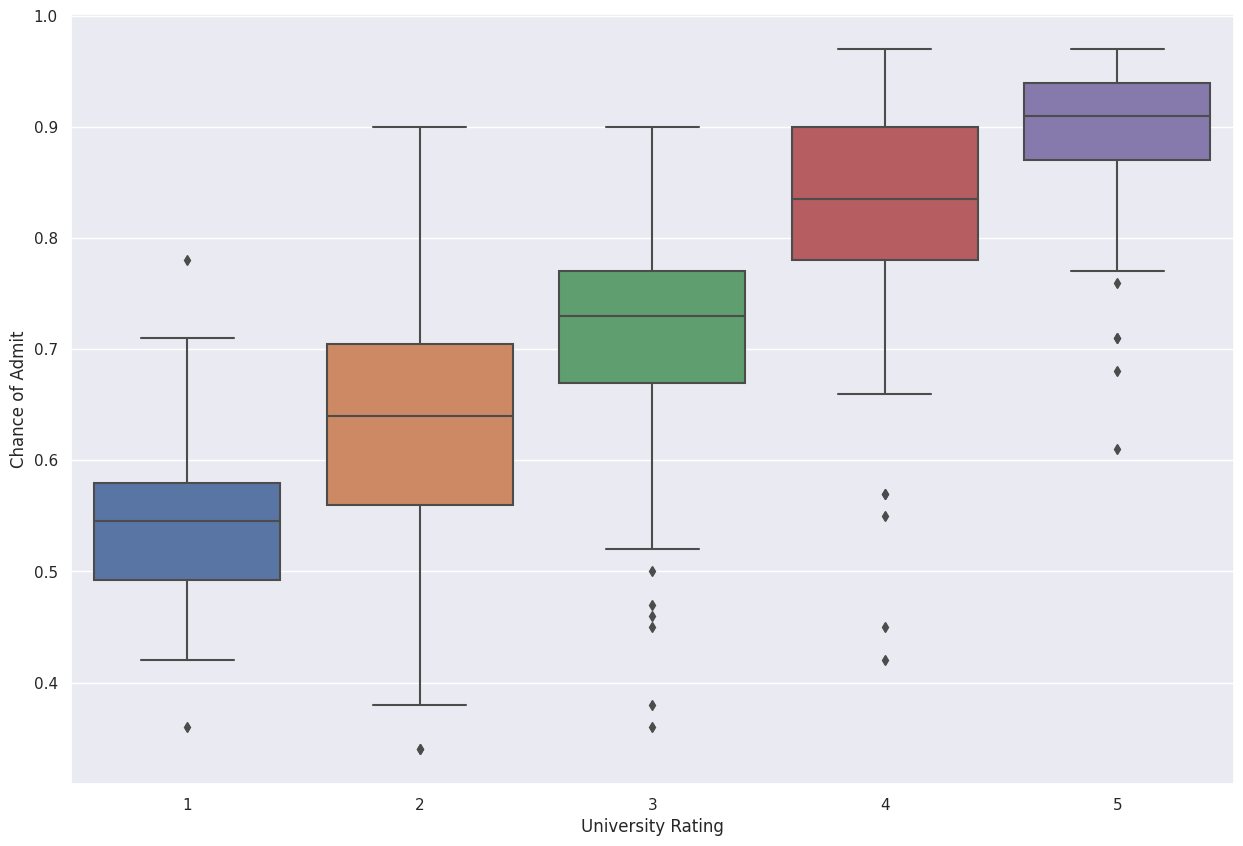

In [27]:
#plotting using boxplot for better visualization
plt.figure(figsize=(15,10))
sns.boxplot(x='University Rating',y='Chance of Admit', data=data)

In [28]:
# Checking the correaltion
data[['University Rating','Chance of Admit']].corr()

,University Rating,Chance of Admit
University Rating,1.00000,0.71125
Chance of Admit,0.71125,1.00000


In [29]:
# Checking the pearson correaltion
coef, pvalue=stats.pearsonr(data['University Rating'],data['Chance of Admit'])
coef,pvalue

(0.7112502503917222, 6.635019480888963e-63)

Pearson correaltion seems good.And the pvalue suggests that it is not by chance. This is a clear trend and direct proportion. The higher the university rating, the higher the chance of admission and it is good predictor of the chance of admission. It will be good to consider it in the training the mode but let`s quickly check the association in ANOVA table.  

In [32]:
# Grouping first by university rating
data_rating_grp=data[['University Rating','Chance of Admit']].groupby(['University Rating'])
f, pvalue=stats.f_oneway(data_rating_grp.get_group(1)['Chance of Admit'],
                         data_rating_grp.get_group(2)['Chance of Admit'],
                         data_rating_grp.get_group(3)['Chance of Admit'],
                         data_rating_grp.get_group(4)['Chance of Admit'],
                         data_rating_grp.get_group(5)['Chance of Admit'])
print('f oneway:',f,'n\p value:',pvalue)

f oneway: 102.0800521553914 n\p value: 1.313389994668425e-59


The ANOVA table shows a very strong association between University Rating and Chance of Admit

# Column : SOP or Statement of Purpose (out of 5)

<Axes: xlabel='SOP', ylabel='Chance of Admit'>

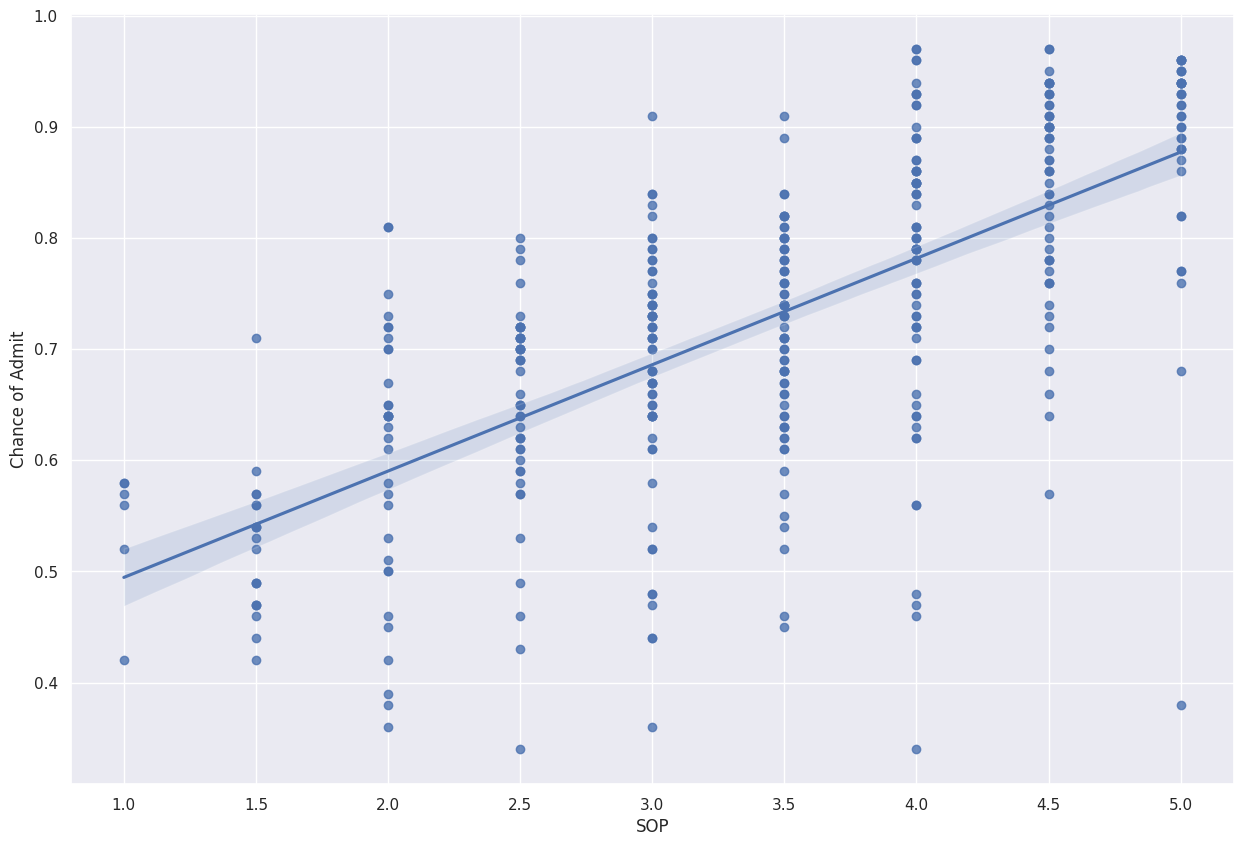

In [33]:
# plotting
plt.figure(figsize=(15,10))
sns.regplot(data=data,x='SOP',y='Chance of Admit')

In [34]:
# Checking the correaltion
data[['SOP','Chance of Admit']].corr()

,SOP,Chance of Admit
SOP,1.000000,0.675732
Chance of Admit,0.675732,1.000000


Let`s make a boxplot for a clear visualization and categorical view

<Axes: xlabel='SOP', ylabel='Chance of Admit'>

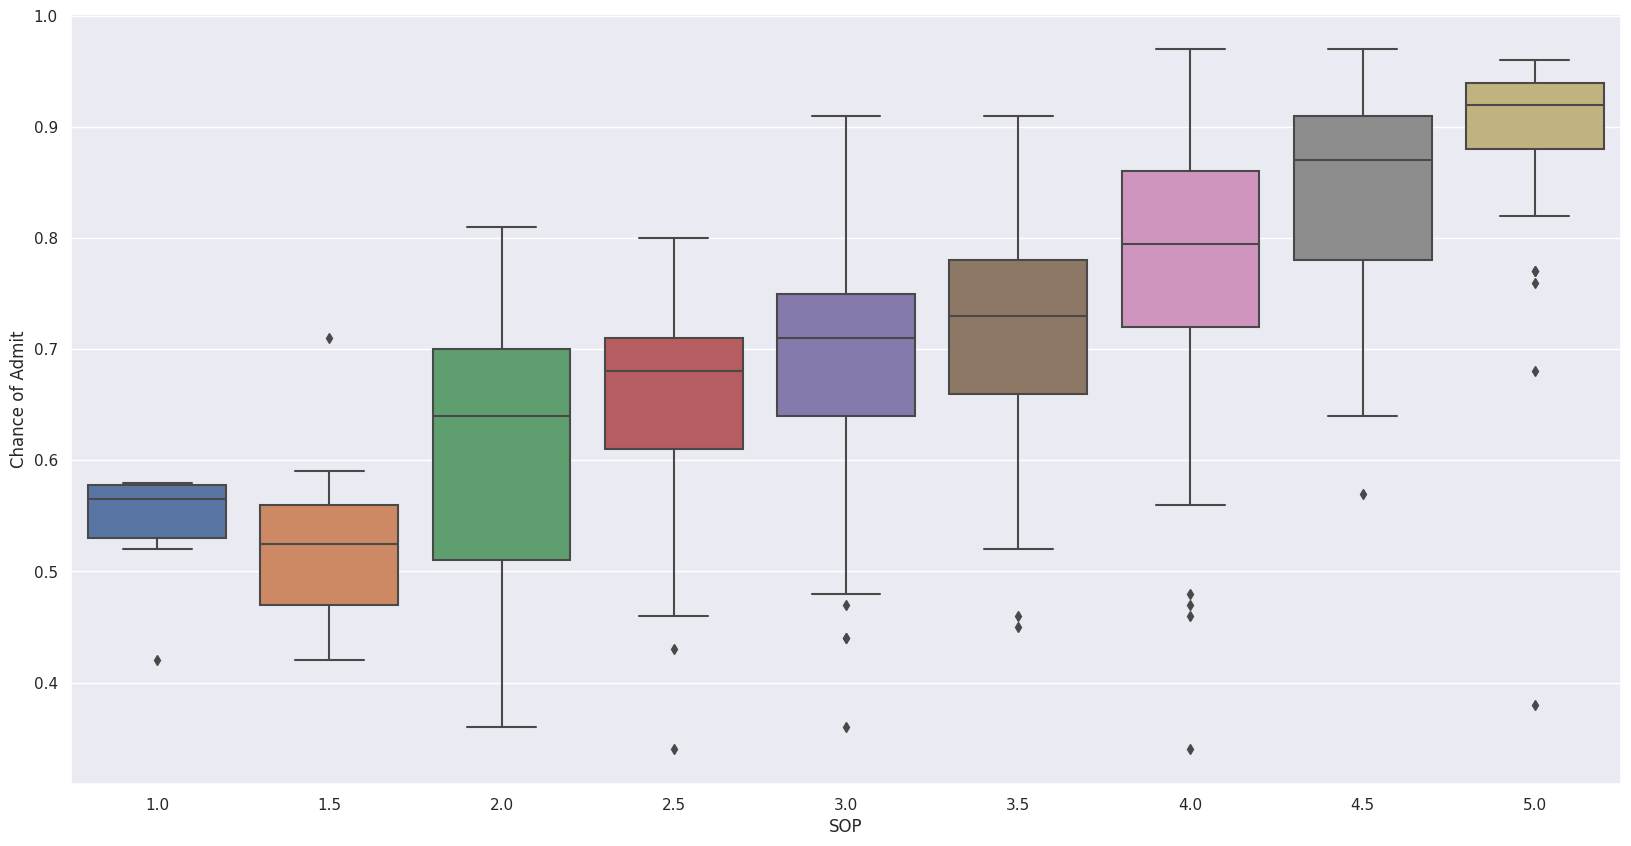

In [36]:
# plotting
plt.figure(figsize=(20,10))
sns.boxplot(data=data,x='SOP',y='Chance of Admit')

From the boxplot there is an incraesing trend.

In [37]:
# Let`s dig deeper to see pearson correaltion coefficient
p_coeff,p_value=stats.pearsonr(data['SOP'],data['Chance of Admit'])
print('Pearson Coefficient:',p_coeff)
print('Pearson value:',p_value)

Pearson Coefficient: 0.675731858388672
Pearson value: 1.1410946671022982e-54


Let`s proceed to use ANOVA table for more insights

In [39]:
# Grouping first by sop
data_sop_grp=data[['SOP','Chance of Admit']].groupby(['SOP'])
f, pvalue=stats.f_oneway(data_sop_grp.get_group(1.0)['Chance of Admit'],
                         data_sop_grp.get_group(2.0)['Chance of Admit'],
                         data_sop_grp.get_group(3.0)['Chance of Admit'],
                         data_sop_grp.get_group(4.0)['Chance of Admit'],
                         data_sop_grp.get_group(5.0)['Chance of Admit'])
print('f oneway:',f,'n\p value:',pvalue)

f oneway: 35.058030380884276 n\p value: 2.6800376113029995e-22


Statement of Purpose from the ANOVA table proves to be a good feature for model building.

# Column : LOR(Letter of Recommendation)

<Axes: xlabel='LOR', ylabel='Chance of Admit'>

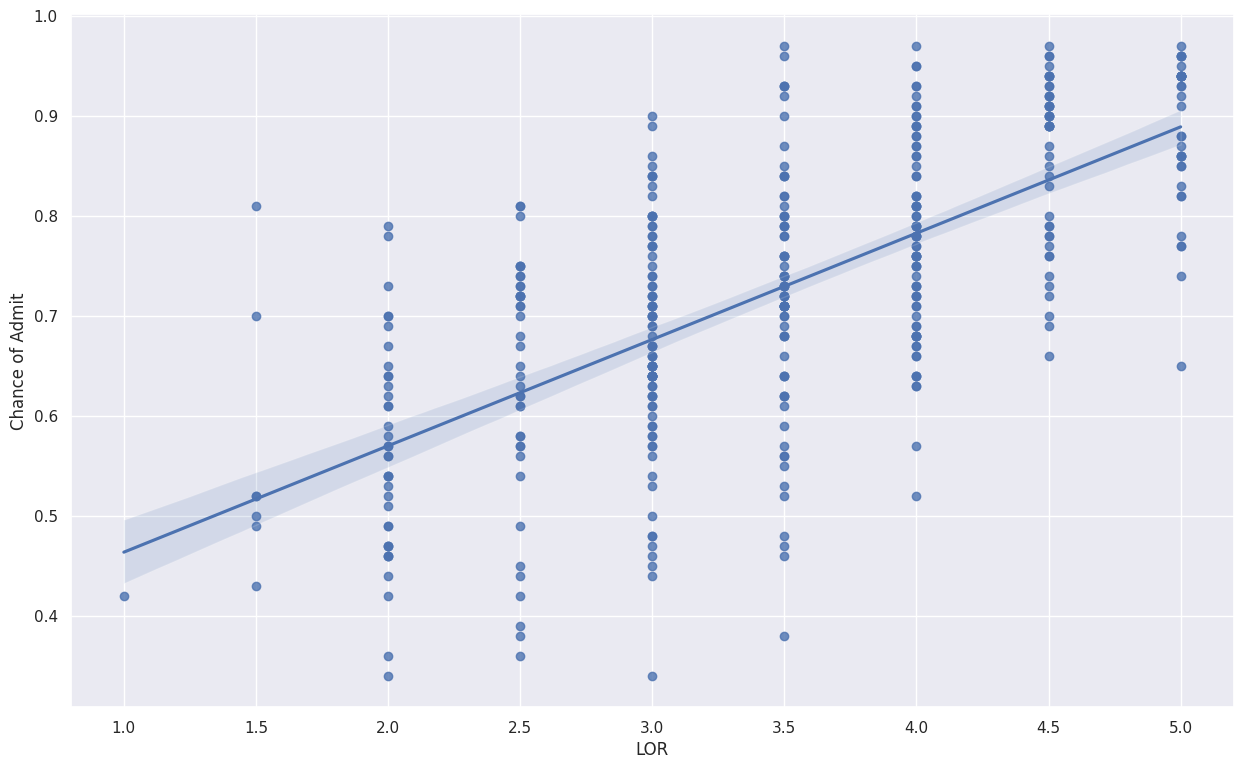

In [40]:
plt.figure(figsize=(15,9))
sns.regplot(x=data.LOR, y=data['Chance of Admit'])

In [41]:
# Checking the correaltion
data[['LOR','Chance of Admit']].corr()

,LOR,Chance of Admit
LOR,1.000000,0.669889
Chance of Admit,0.669889,1.000000


In [42]:
p_coeff,p_value=stats.pearsonr(data.LOR,data['Chance of Admit'])
p_coeff,p_value

(0.6698887920106937, 2.0073145197524523e-53)

In [43]:
# Grouping first by lor
data_lor_grp=data[['LOR','Chance of Admit']].groupby(['LOR'])
f, pvalue=stats.f_oneway(data_lor_grp.get_group(1.0)['Chance of Admit'],
                         data_lor_grp.get_group(2.0)['Chance of Admit'],
                         data_lor_grp.get_group(3.0)['Chance of Admit'],
                         data_lor_grp.get_group(4.0)['Chance of Admit'],
                         data_lor_grp.get_group(5.0)['Chance of Admit'])
print('f oneway:',f,'n\p value:',pvalue)

f oneway: 58.46497540932886 n\p value: 4.932976965496219e-34


# Column : CGPA

<Axes: xlabel='CGPA', ylabel='Chance of Admit'>

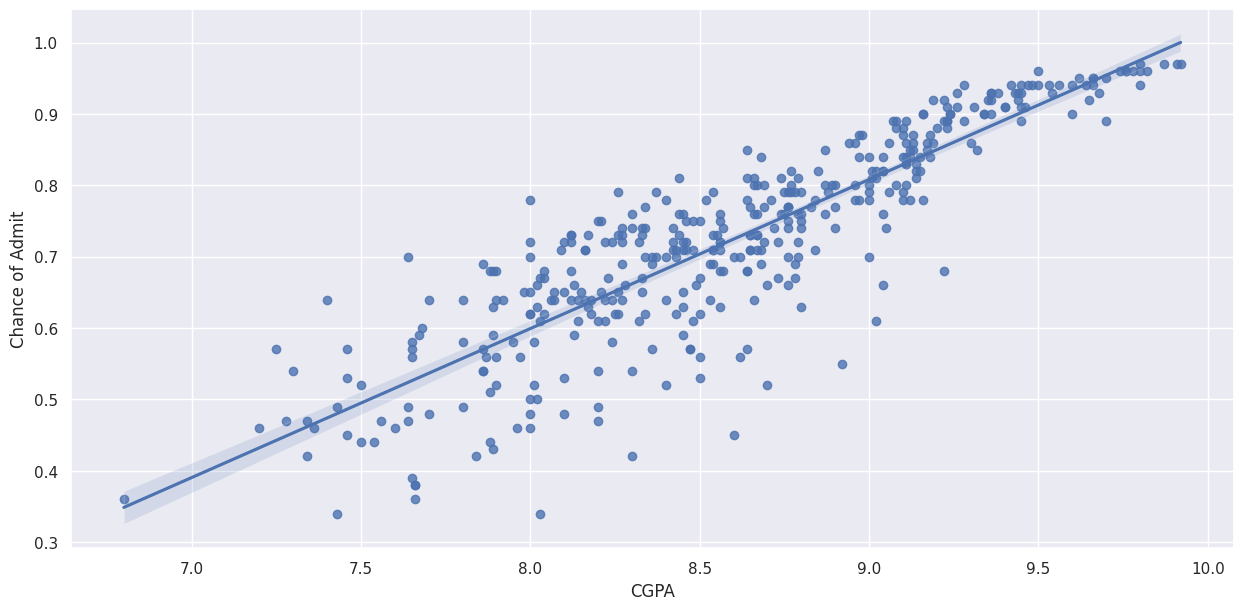

In [45]:
plt.figure(figsize=(15,7))
sns.regplot(x=data.CGPA, y=data['Chance of Admit'])

In [47]:
data[['CGPA','Chance of Admit']].corr()

,CGPA,Chance of Admit
CGPA,1.000000,0.873289
Chance of Admit,0.873289,1.000000


In [48]:
p_coeff,pvalue=stats.pearsonr(data.CGPA,data['Chance of Admit'])
p_coeff,pvalue

(0.8732890993553003, 2.3365140004978882e-126)

It`s clear that CGPA is a strong predictor for the model

# Column: Reasearch

<Axes: xlabel='Research', ylabel='Chance of Admit'>

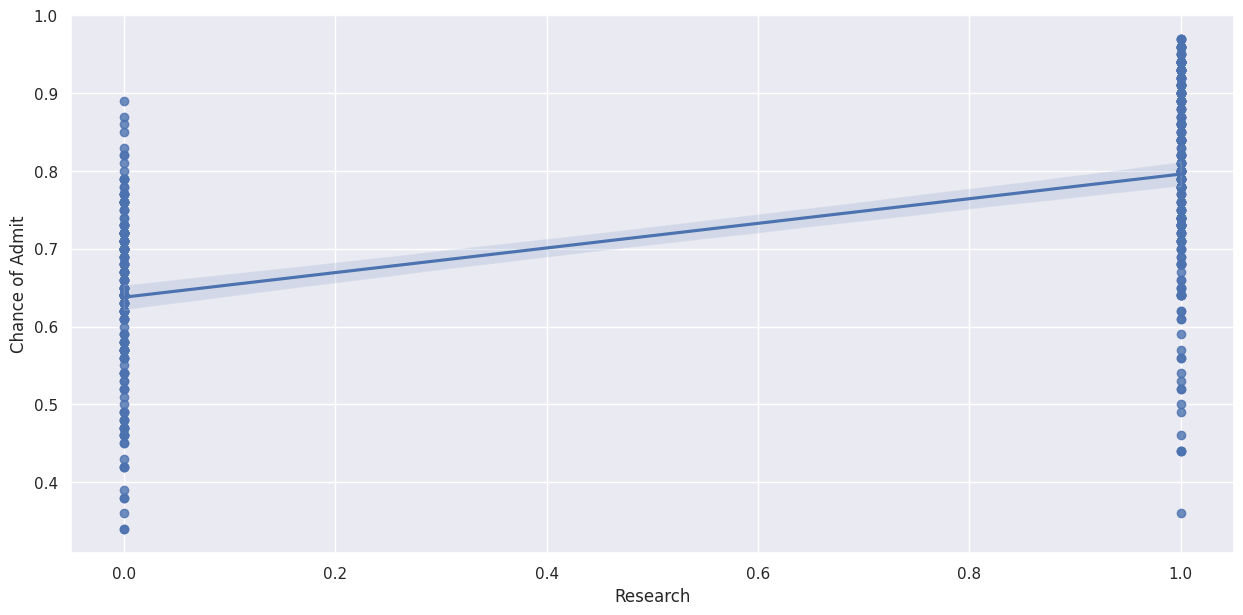

In [49]:
plt.figure(figsize=(15,7))
sns.regplot(x=data.Research,y=data['Chance of Admit'])

In [51]:
data[['Research','Chance of Admit']].corr()

,Research,Chance of Admit
Research,1.000000,0.553202
Chance of Admit,0.553202,1.000000


<Axes: xlabel='Research', ylabel='count'>

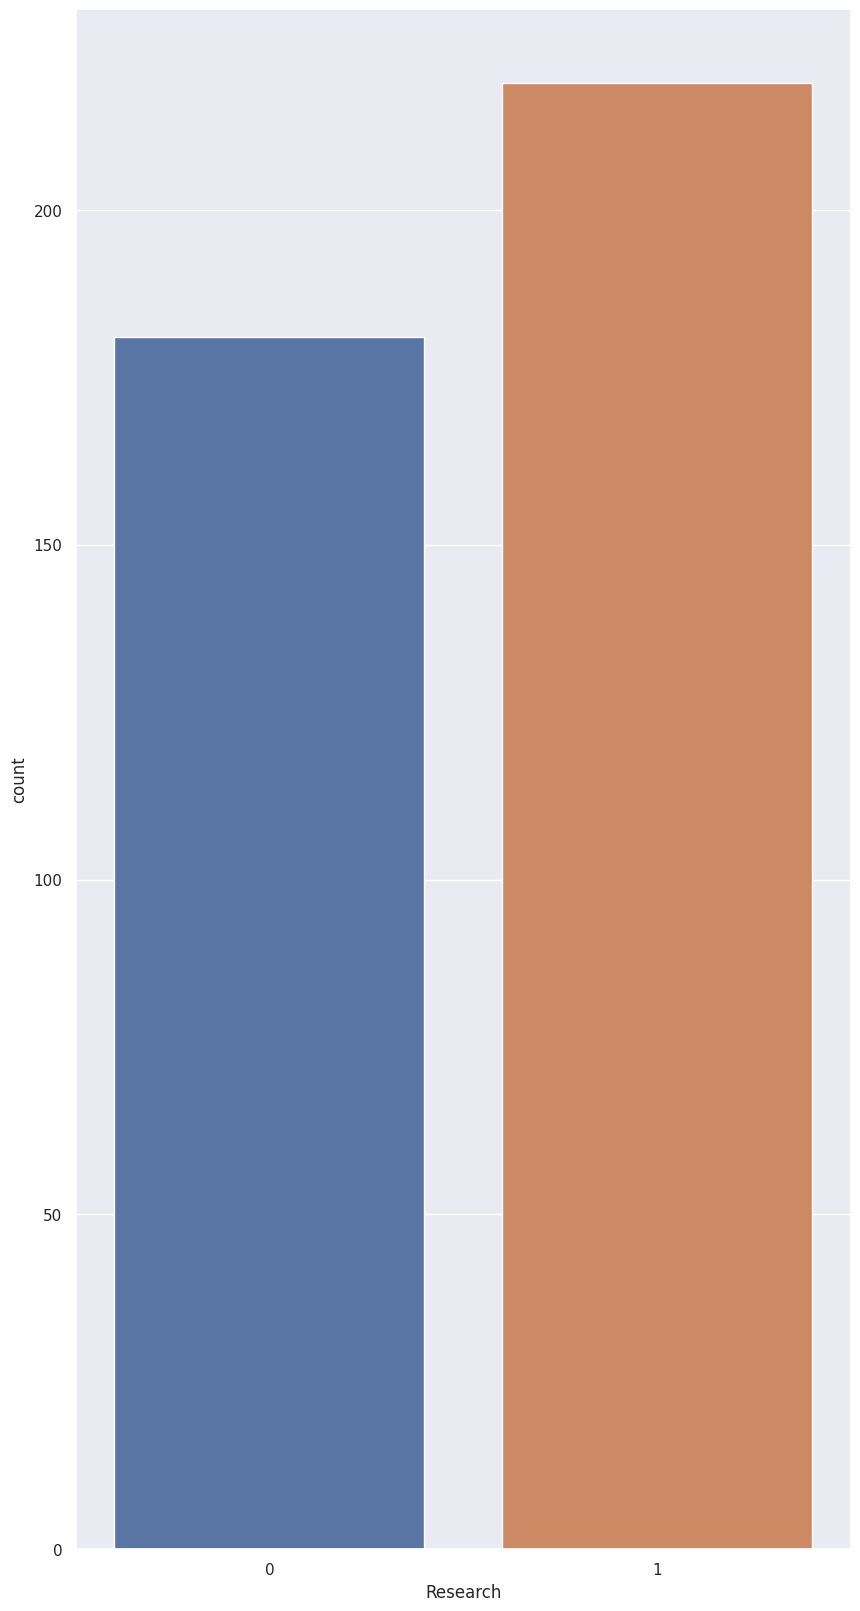

In [53]:
plt.figure(figsize=(10,20))
sns.countplot(x=data.Research)

From the countplot, there are more candidates with research background and without research background are less

<Axes: xlabel='Research', ylabel='Chance of Admit'>

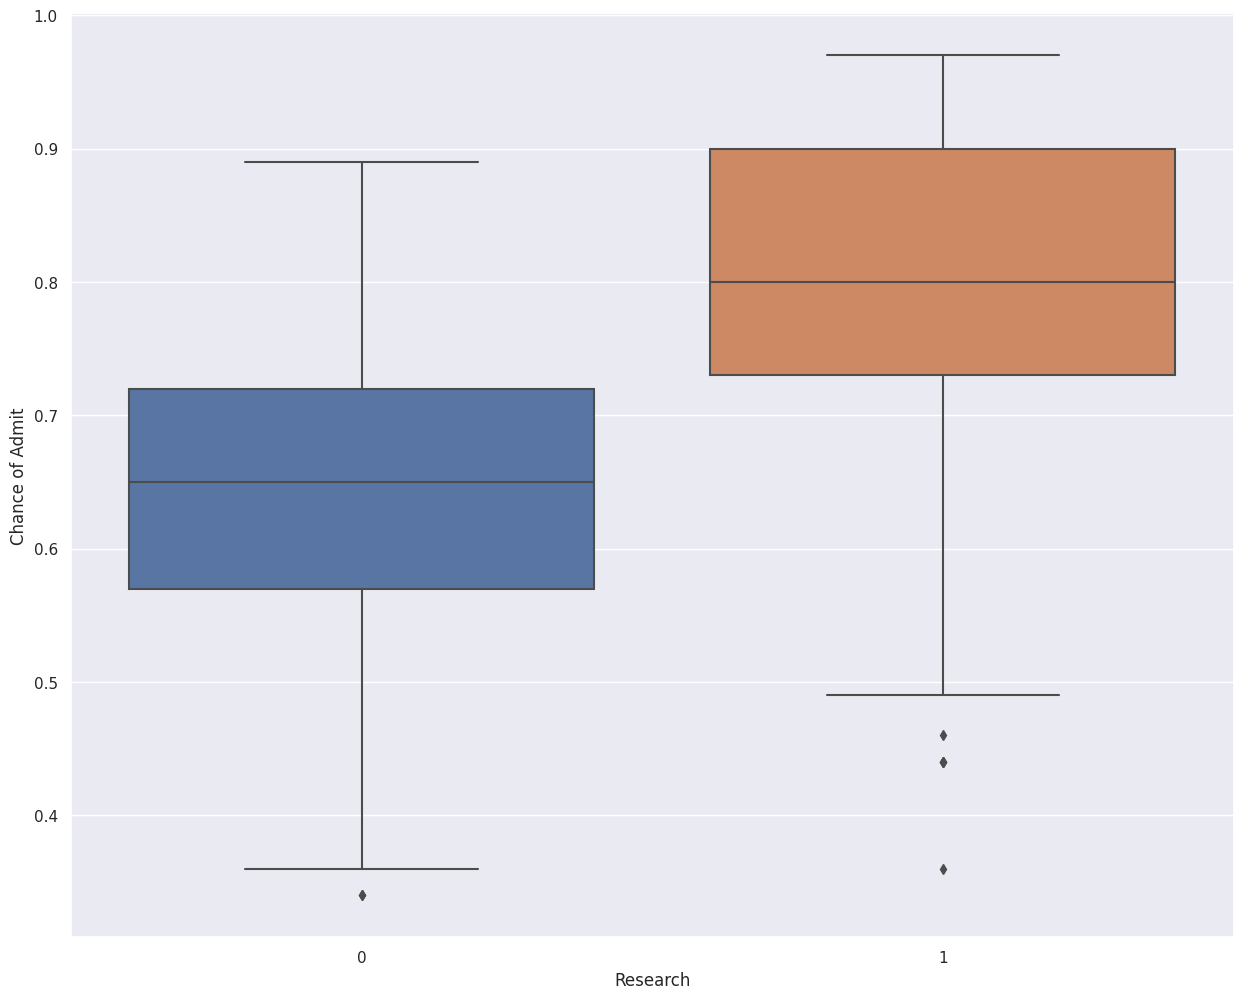

In [54]:
plt.figure(figsize=(15,12))
sns.boxplot(x=data.Research, y=data['Chance of Admit'])

From the boxplot too it is evident that the chance of admission of those having research background is more than those without a research ground. We can proceed to perform to perform ANOVA test too

In [55]:
data_res_grp=data[['Research','Chance of Admit']].groupby(['Research'])

In [58]:
f,pvalue=stats.f_oneway(data_res_grp.get_group(1)['Chance of Admit'],
                        data_res_grp.get_group(0)['Chance of Admit'])
f,pvalue

(175.51397562026247, 1.9181733806927185e-33)

# Descriptive Analytics : Analyzing predictors a month themselves

<Axes: >

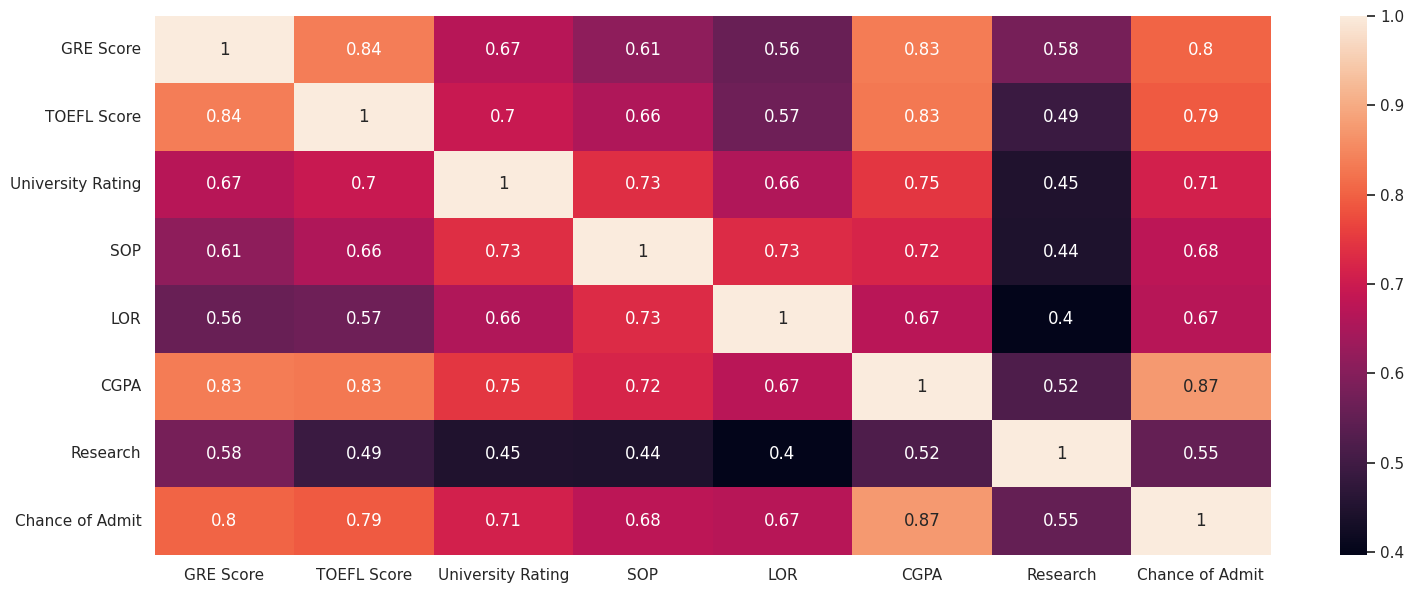

In [59]:
# Checking the heatmap, of correaltion for all the columns or features
plt.figure(figsize=(18,7))
sns.heatmap(data.corr(),annot=True)

Well, by looking at the heatmap, we can infer that there exists great multicollinearity in the data

# GRE Score and CGPA

<Axes: title={'center': 'Relationship between CGPA and GRE Score'}, xlabel='GRE Score', ylabel='CGPA'>

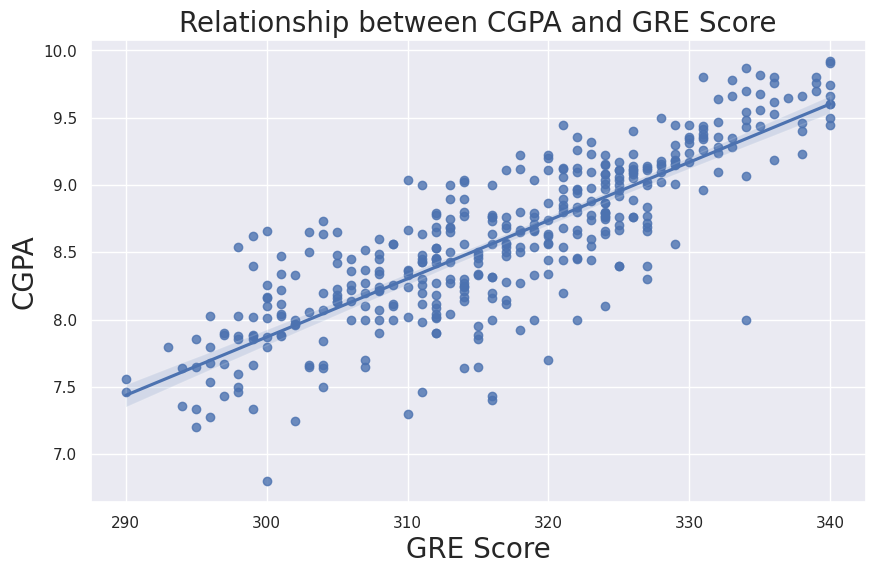

In [60]:
plt.figure(figsize=(10,6))
plt.title('Relationship between CGPA and GRE Score',fontsize=20)
plt.xlabel('',fontsize=20)
plt.ylabel('',fontsize=20)
sns.regplot(x=data['GRE Score'],y=data.CGPA)

From the above plot, it is evident that students with high GRE Score trend to get higher CGPA as compared to others

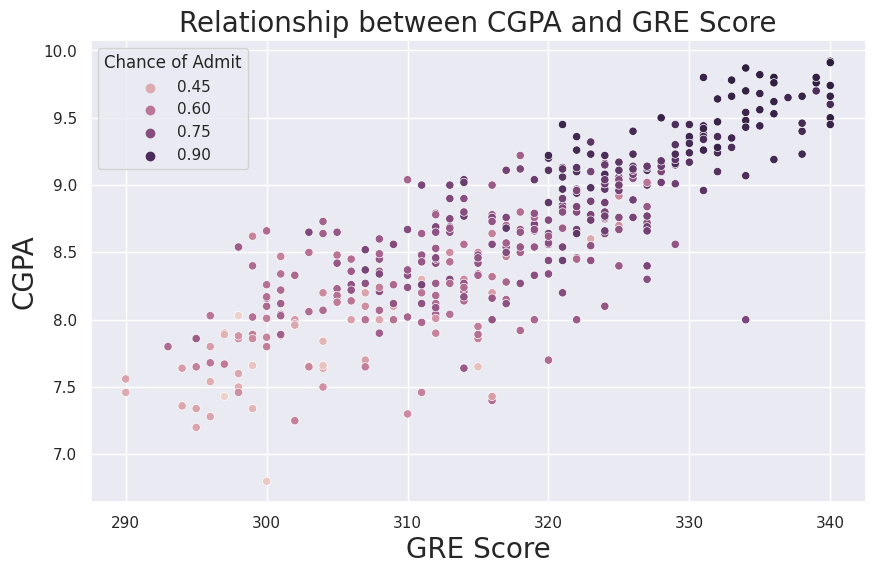

In [61]:
# Comparing the above plot with the chance of Admission
plt.figure(figsize=(10,6))
sns.scatterplot(x=data['GRE Score'],y=data.CGPA,hue=data['Chance of Admit'])
plt.title('Relationship between CGPA and GRE Score',fontsize=20)
plt.xlabel('GRE Score',fontsize=20)
plt.ylabel('CGPA',fontsize=20)
plt.show()

Chance of Admissions is higher for those having greater CGPA and GRE Score

# Predicting Admissions

First of all, let`s separate the label(y) from the data (x)

In [62]:
X=data.drop('Chance of Admit',axis=1)
Y=data[['Chance of Admit']]
X.shape, Y.shape

((400, 7), (400, 1))

Separating training and testing data

In [63]:
# Importing train_test_split
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,random_state=42,shuffle=True,test_size=0.30)

print(xtrain.shape,ytrain.shape)
print(xtest.shape,xtrain.shape)

(280, 7) (280, 1)
(120, 7) (280, 7)


# Reducing multicollinearity using regularization

In [64]:
from sklearn.linear_model import LassoCV
lasso=LassoCV(random_state=42,n_jobs=4)
lasso.fit(xtrain,ytrain)
regularized_model_prediction=lasso.predict(xtest)

In [65]:
from sklearn.metrics import r2_score
r2_score(ytest,regularized_model_prediction)

0.7904544971285603

In [66]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

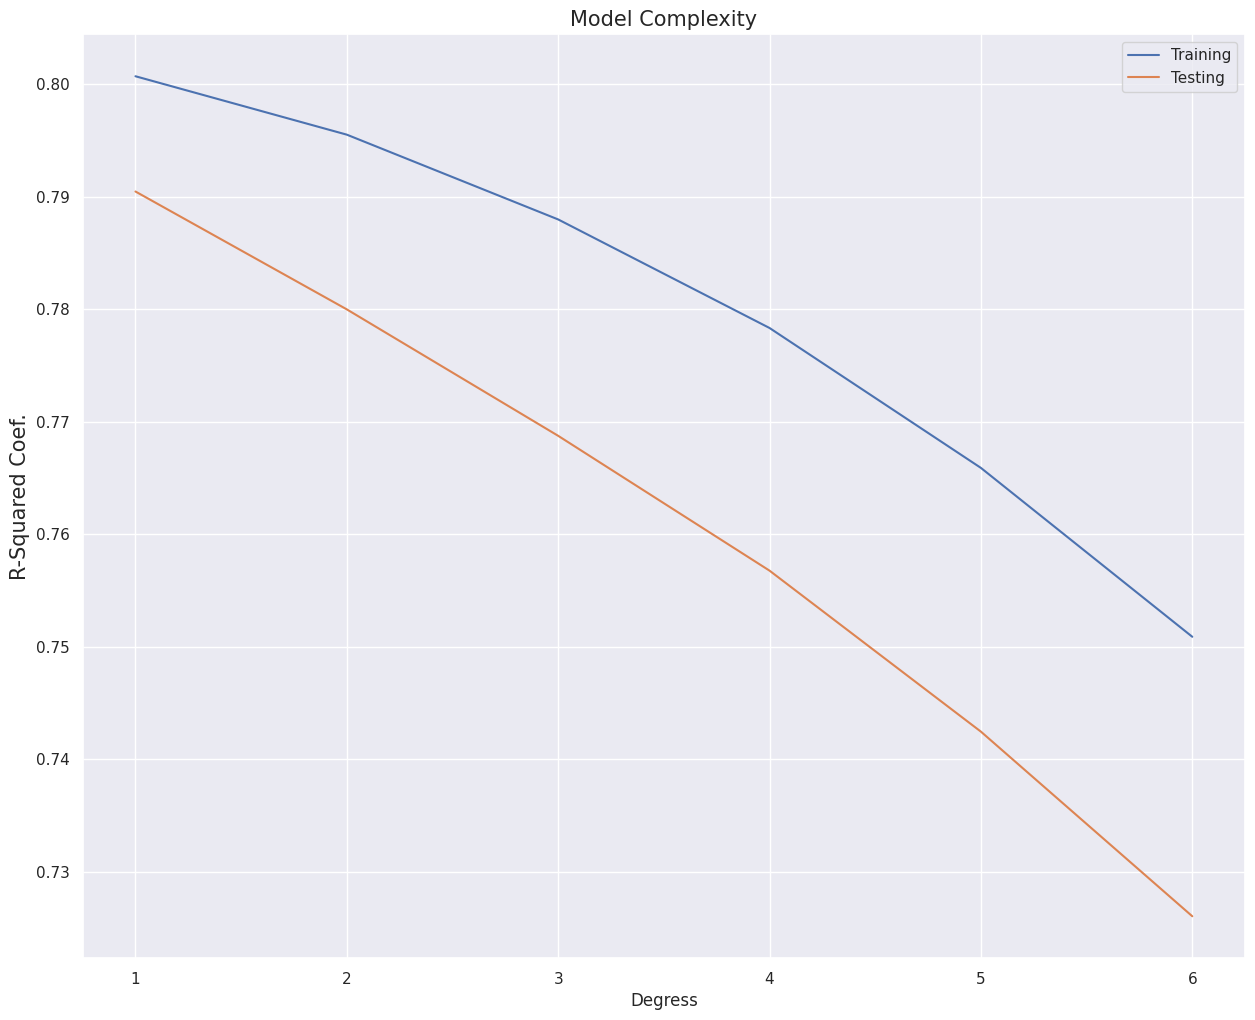

In [68]:
train_r2_scores=[]
test_r2_scores=[]
for degree in range(1,7):
  model_poly=PolynomialFeatures(degree=degree)
  xtrain_poly=model_poly.fit_transform(xtrain)
  xtest_poly=model_poly.fit_transform(xtest)

  model_lasso=LassoCV(random_state=42,n_jobs=4,cv=5)
  model_lasso.fit(xtrain_poly,ytrain)

  train_r2_scores.append(r2_score(ytrain,model_lasso.predict(xtrain_poly)))
  test_r2_scores.append(r2_score(ytest,model_lasso.predict(xtest_poly)))

#Displaying the model complexity
plt.figure(figsize=(15,12))
sns.lineplot(x=range(1,7),y=train_r2_scores,label='Training')
sns.lineplot(x=range(1,7),y=test_r2_scores,label='Testing')
plt.xlabel('Degress',fontsize=12)
plt.ylabel('R-Squared Coef.',fontsize=15)
plt.title('Model Complexity',fontsize=15)
plt.show

In [69]:
list(zip(train_r2_scores,test_r2_scores))

[(0.80070050103323, 0.7904544971285604),
 (0.7955076163210544, 0.7799760527549302),
 (0.7879704622071677, 0.7687361739601017),
 (0.7783209420390932, 0.756750461817704),
 (0.7658842628448679, 0.7424397450596303),
 (0.7508735042707297, 0.726029895508428)]

Well, by looking at the graph above, we can select the first or second degree. But it is getting rather diffcult selecting the right degree(Overfitting is diffcult to recongize at this point). Now let`s check the complexity on RidgeCV(L2 Regulariztion)

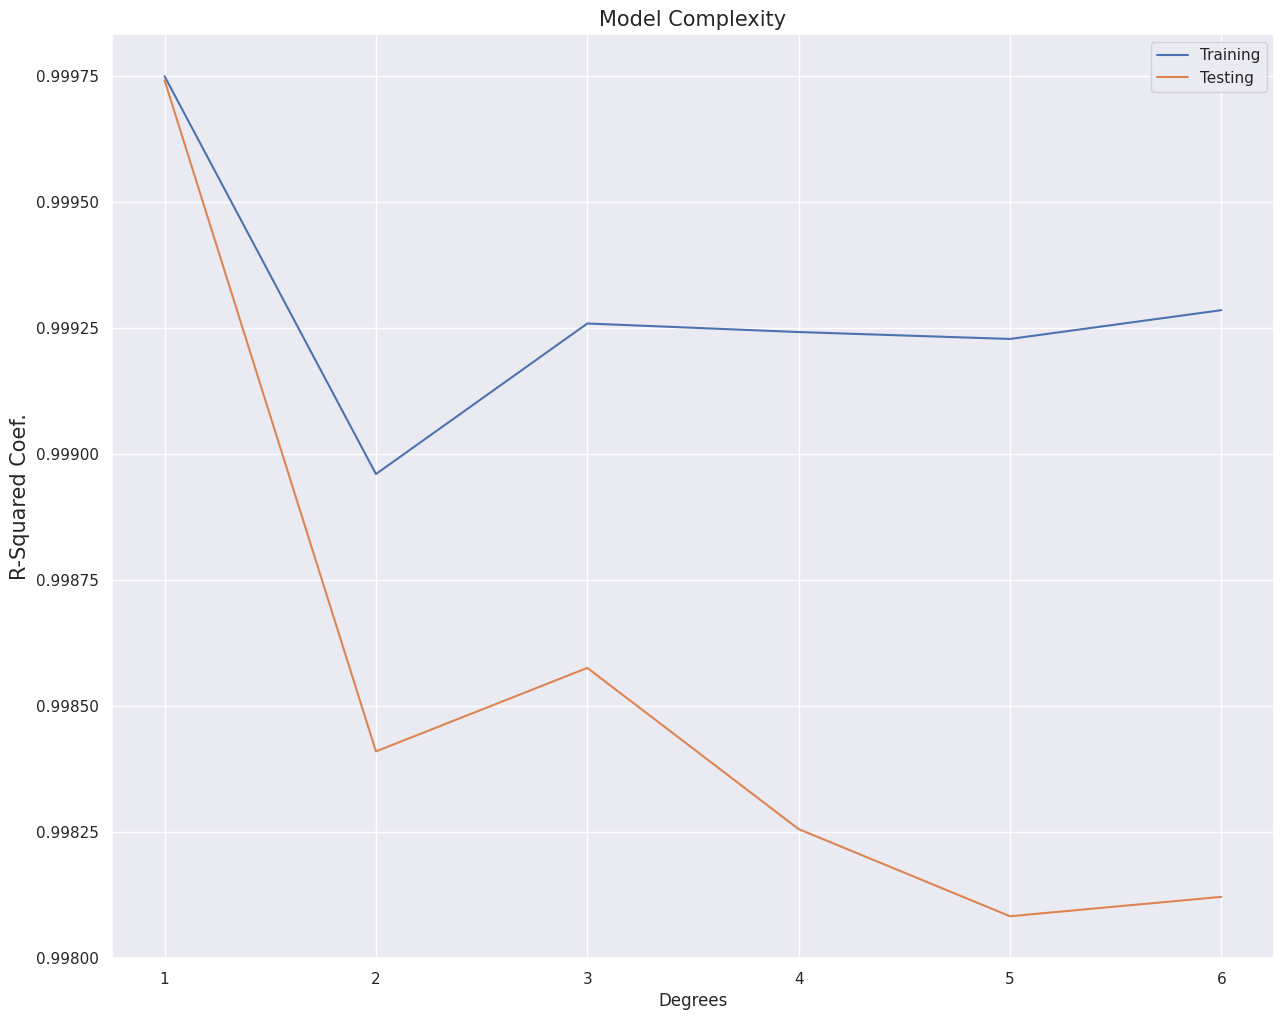

In [91]:
from sklearn.linear_model import RidgeCV
train_r2_scores = []
test_r2_scores = []
for degree in range(1, 7):
    # Converting the features to polynomial
    model_poly = PolynomialFeatures(degree=degree)
    xtrain_poly = model_poly.fit_transform(xtrain)  # Fit-transform only once for each set
    xtest_poly = model_poly.transform(xtest)        # Transform using the same model

    # Initializing LassoCV
    model_ridge = RidgeCV(cv=5)  # Fixed variable name and class instantiation
    model_ridge.fit(xtrain_poly, ytrain)

    # Getting the training score in the list
    train_r2_scores.append(r2_score(ytrain, model_ridge.predict(xtrain_poly)))
    test_r2_scores.append(r2_score(ytest, model_ridge.predict(xtest_poly)))

# Displaying the model complexity
plt.figure(figsize=(15, 12))
sns.lineplot(x=range(1, 7), y=train_r2_scores, label='Training')
sns.lineplot(x=range(1, 7), y=test_r2_scores, label='Testing')
plt.xlabel('Degrees', fontsize=12)
plt.ylabel('R-Squared Coef.', fontsize=15)
plt.title('Model Complexity', fontsize=15)
plt.show()

In [92]:
list(zip(train_r2_scores,test_r2_scores))

[(0.9997485401090307, 0.9997403205358288),
 (0.9989596280397881, 0.9984096069134888),
 (0.9992582115027, 0.9985751849208473),
 (0.9992412377391718, 0.9982554585346778),
 (0.9992275468305544, 0.9980826535920196),
 (0.999284650318816, 0.9981211301258293)]

Looking at degree 2, R -Squared Coefficient is 0.8308 which seems good

# Applying K-NearestNeighbors Algorithm

In [83]:
from sklearn.neighbors import KNeighborsRegressor

KNN algorithm is a distance algorithm and thus our data has to be scaled.

In [84]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled=scaler.fit_transform(data)
x=pd.DataFrame(data=scaled,columns=data.columns)
x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0,0.920635
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0,0.666667
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0,0.603175
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0,0.730159
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0,0.492063


# Model Fitting

In [85]:
# fitting the model
model_knn = KNeighborsRegressor()

Now`s let`s split the scaled data into training and testing

In [86]:
xtrain, xtest, ytrain, ytest = train_test_split(x, Y, random_state=42, test_size=0.3, shuffle=True)
print(xtrain.shape, xtest.shape)
print(ytrain.shape, ytest.shape)

(280, 8) (120, 8)
(280, 1) (120, 1)


Fitting the data into decsion tree Model

In [87]:
model_knn.fit(xtrain, ytrain)

KNeighborsRegressor()

In [88]:
knn_pred_test = model_knn.predict(xtest)

In [89]:
knn_pred_train = model_knn.predict(xtrain)

In [90]:
knn_r2_train = r2_score(ytrain, knn_pred_train)
knn_r2_test = r2_score(ytest, knn_pred_test)
print(knn_r2_train, knn_r2_test)

0.9288767824214093 0.9107595585471692


The result was on default neighbor size of 5. Let`s check the optimal number of neighbors of KNN

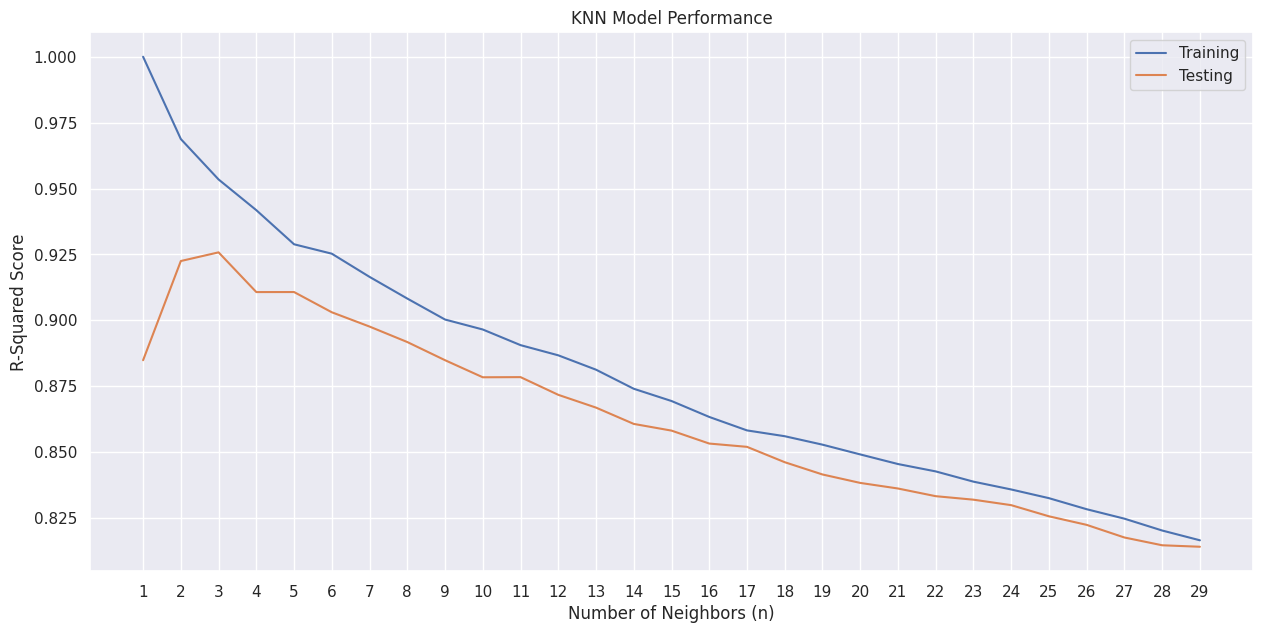

In [93]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

train_r2_scores=[]
test_r2_scores=[]
for n in range(1, 30):
    # Initializing KNN
    model_knn = KNeighborsRegressor(n_neighbors=n)

    # Fitting the data and making predictions for both training and testing dataset
    model_knn.fit(xtrain, ytrain)
    knn_pred_train, knn_pred_test = model_knn.predict(xtrain), model_knn.predict(xtest)
    # Storing the R-Squared Coefficients into lists
    train_r2_scores.append(r2_score(ytrain, knn_pred_train))
    test_r2_scores.append(r2_score(ytest, knn_pred_test))

# Plotting
plt.figure(figsize=(15, 7))
sns.lineplot(x=range(1, 30), y=train_r2_scores, label='Training')
sns.lineplot(x=range(1, 30), y=test_r2_scores, label='Testing')
plt.xticks(range(1, 30))
plt.xlabel('Number of Neighbors (n)')
plt.ylabel('R-Squared Score')
plt.title('KNN Model Performance')
plt.legend()
plt.show()

So, around 11 neighbors, we see that the training and testing score is almost the same. We can take this number of neighbors and apply some model complexity.

# Model Complexity

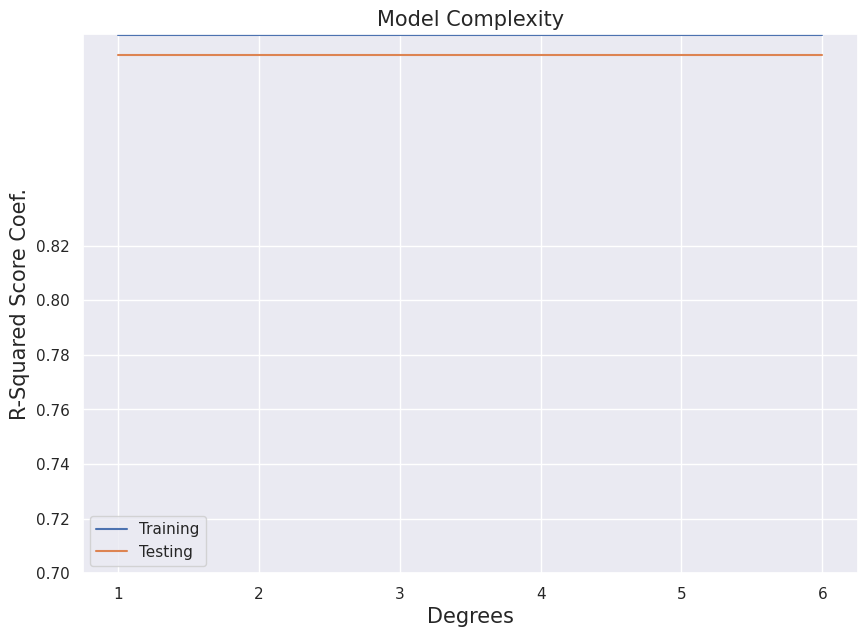

In [94]:
#Checking the degree from 1 to 6
train_r2_scores = []
test_r2_scores = []

for n in range(1, 7):
    # Converting the features to polynomial
    model_poly = PolynomialFeatures(degree=degree)
    xtrain_poly, xtest_poly = model_poly.fit_transform(xtrain), model_poly.fit_transform(xtest)
    # Initializing KNN
    model_knn = KNeighborsRegressor(n_neighbors=11)
    model_knn.fit(xtrain_poly, ytrain)
    # Getting the training score in the list
    train_r2_scores.append(r2_score(ytrain, model_knn.predict(xtrain_poly)))
    test_r2_scores.append(r2_score(ytest, model_knn.predict(xtest_poly)))

    # Plotting to display complexity
plt.figure(figsize=(10, 7))
sns.lineplot(x=range(1, 7), y=train_r2_scores, label='Training')
sns.lineplot(x=range(1, 7), y=test_r2_scores, label='Testing')
plt.xlabel('Degrees', fontsize=15)
plt.ylabel('R-Squared Score Coef.', fontsize=15)
plt.title('Model Complexity', fontsize=15)
plt.xticks(range(1, 7))  # Set x-axis ticks for each degree
plt.yticks([0.7,0.72, 0.74, 0.76, 0.78, 0.8, 0.82])
plt.show()

In [95]:
list(zip(train_r2_scores, test_r2_scores))

[(0.8970561232871562, 0.8897755626867223),
 (0.8970561232871562, 0.8897755626867223),
 (0.8970561232871562, 0.8897755626867223),
 (0.8970561232871562, 0.8897755626867223),
 (0.8970561232871562, 0.8897755626867223),
 (0.8970561232871562, 0.8897755626867223)]